In [1]:
from sklearn.datasets import fetch_california_housing

cal_housing = fetch_california_housing(as_frame=True)
cal_housing.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [2]:
cal_housing.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [3]:
cal_housing.target.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

In [6]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cal_tree = DecisionTreeRegressor()
cv_scores = cross_val_score(cal_tree, cal_housing.data, cal_housing.target, cv=KFold(n_splits=5, shuffle=True), scoring='neg_mean_absolute_error')
print(-cv_scores.mean(), cv_scores.std())

0.45679891569767445 0.01403190728388098


In [7]:
from sklearn.ensemble import BaggingRegressor

bagging_cal_tree = BaggingRegressor(DecisionTreeRegressor(), n_estimators=50)
bagged_cv_scores = cross_val_score(bagging_cal_tree, cal_housing.data, cal_housing.target, cv=KFold(n_splits=5, shuffle=True), scoring='neg_mean_absolute_error' )

In [8]:
print(-bagged_cv_scores.mean(), bagged_cv_scores.std())

0.32892819632751935 0.004855163752686644


In [11]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=50)
forest_cv_scores = cross_val_score(forest, cal_housing.data, cal_housing.target, cv=KFold(n_splits=5, shuffle=True),scoring='neg_mean_absolute_error' )

In [12]:
print(-forest_cv_scores.mean(), forest_cv_scores.std())

0.33062939706395345 0.004672937615380066


In [14]:
from sklearn.ensemble import ExtraTreesRegressor

forest_extra = ExtraTreesRegressor(n_estimators=50)
forest_extra_cv_scores = cross_val_score(forest_extra, cal_housing.data, cal_housing.target, cv=KFold(n_splits=5, shuffle=True),scoring='neg_mean_absolute_error' )

In [16]:
print(-forest_extra_cv_scores.mean(), forest_extra_cv_scores.std())

0.32601427271317823 0.005108352240768781


In [25]:
import numpy as np
forest_extra = ExtraTreesRegressor(n_estimators=50)
forest_extra.fit(cal_housing.data, cal_housing.target)
importances = forest_extra.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest_extra.estimators_], axis=0)
indeces = np.argsort(importances)[::-1]

for i in indeces:
    print(cal_housing.feature_names[i], importances[i])

MedInc 0.4991472845738227
Longitude 0.11343374539895393
Latitude 0.10762818284782581
AveOccup 0.10758576059404942
HouseAge 0.07017936053743111
AveRooms 0.04098088962279106
AveBedrms 0.03376941726575939
Population 0.027275359159366543


<BarContainer object of 8 artists>

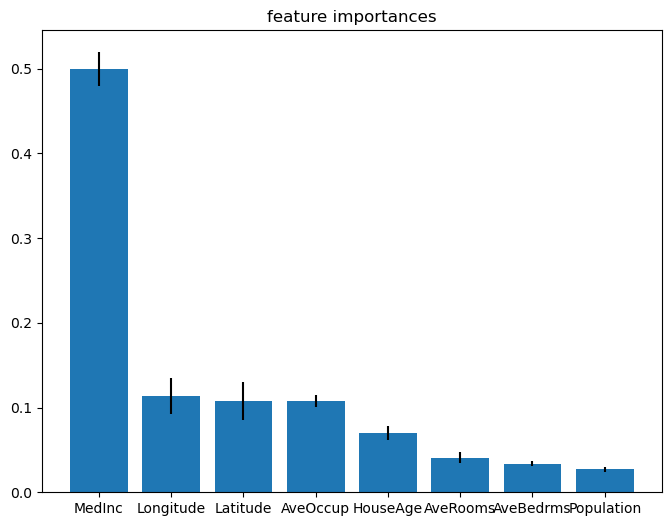

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title('feature importances')
plt.bar(range(len(cal_housing.feature_names)), importances[indeces], tick_label=[cal_housing.feature_names[x] for x in indeces], yerr=std[indeces])

In [34]:
from sklearn.ensemble import AdaBoostRegressor

clf = DecisionTreeRegressor()
ada_boost_rgr = AdaBoostRegressor(clf, n_estimators=50)
ada_boost_rgr_scores = cross_val_score(ada_boost_rgr, cal_housing.data, cal_housing.target, cv=KFold(n_splits=5, shuffle=True), scoring='neg_mean_absolute_error')
print(-ada_boost_rgr_scores.mean(), ada_boost_rgr_scores.std())

0.3005654980620155 0.007713895452027948


In [35]:
clf = DecisionTreeRegressor()
ada_boost_rgr = AdaBoostRegressor(clf, n_estimators=50)
ada_boost_rgr.fit(cal_housing.data, cal_housing.target)
importances = ada_boost_rgr.feature_importances_

std = np.std([tree.feature_importances_ for tree in ada_boost_rgr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

for i in indices:
    print(cal_housing.feature_names[i], importances[i])

MedInc 0.3036287865100467
AveOccup 0.14749970809954002
Longitude 0.14357410252764014
Latitude 0.1416914825308065
HouseAge 0.07240945493240886
AveRooms 0.06793439589851215
Population 0.06565310520843151
AveBedrms 0.05760896429261424


<BarContainer object of 8 artists>

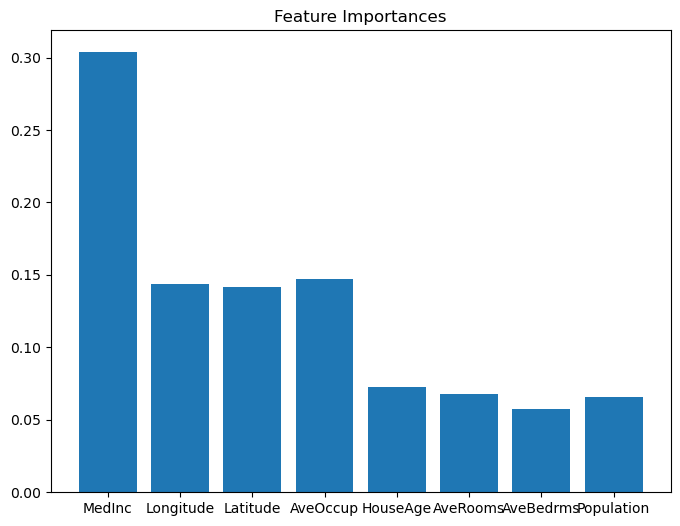

In [37]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.bar(range(len(cal_housing.feature_names)), importances[indeces], tick_label=[cal_housing.feature_names[x] for x in indeces],)

In [42]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor()

scores = cross_val_score(xgb_reg, cal_housing.data, cal_housing.target, cv=KFold(n_splits=5, shuffle=True), scoring='neg_mean_absolute_error')

In [43]:
print(-scores.mean(), scores.std())

0.31048343589257427 0.005270328240032762


In [44]:
xgb_reg.fit(cal_housing.data, cal_housing.target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

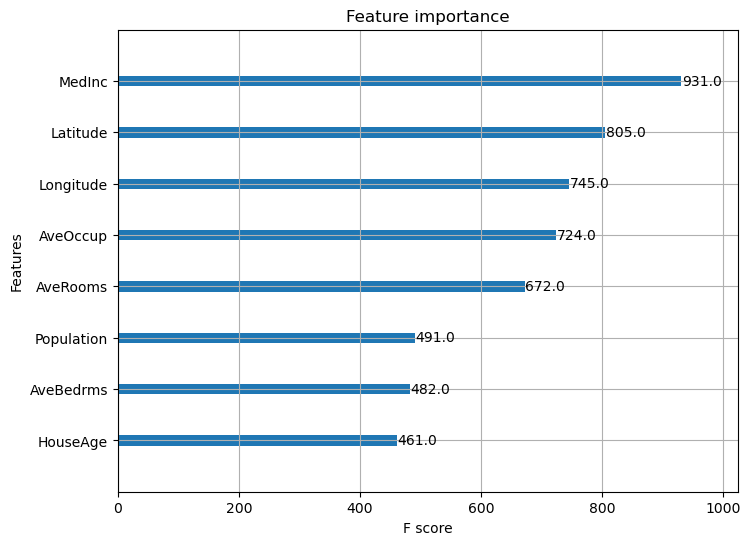

In [46]:
fig = plt.figure(figsize=(8, 6))
xgb_reg.get_booster().feature_names = cal_housing.feature_names
xgb.plot_importance(xgb_reg, ax=fig.gca())

In [47]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor()
scores = cross_val_score(lgb_reg, 
                         cal_housing.data, 
                         cal_housing.target,
                         scoring="neg_mean_absolute_error",
                         cv=KFold(n_splits=5, shuffle=True),
                         n_jobs=-1)

print(-scores.mean(), scores.std())

0.3111262598116751 0.0027690925121507124


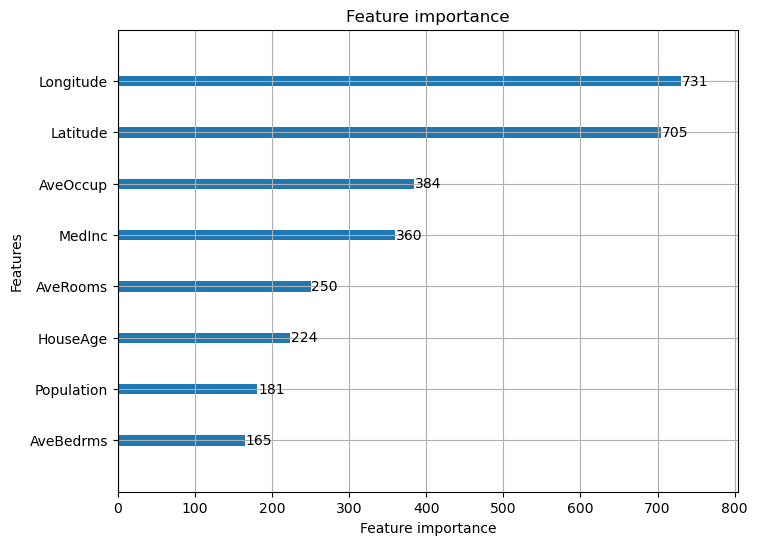

In [48]:
lgb_reg = lgb.LGBMRegressor()
lgb_reg.fit(cal_housing.data, cal_housing.target, 
            feature_name=cal_housing.feature_names)
_ = lgb.plot_importance(lgb_reg, figsize=(8, 6))

In [49]:
from sklearn.ensemble import VotingRegressor

xgb_reg = xgb.XGBRegressor()
lgb_reg = lgb.LGBMRegressor()
vreg = VotingRegressor(estimators=[('xgb', xgb_reg), 
                                   ('lgb', lgb_reg)],
                       n_jobs=-1)
                       
scores = cross_val_score(vreg, 
                         cal_housing.data, 
                         cal_housing.target,
                         scoring='neg_mean_absolute_error', 
                         cv=KFold(n_splits=5, shuffle=True),
                         n_jobs=-1)

In [50]:
print(-scores.mean(), scores.std())

0.30098120775321413 0.005104378047045541


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor

xgb_reg = xgb.XGBRegressor()
lgb_reg = lgb.LGBMRegressor()

estimators = [('xgb', xgb_reg), ('lgb', lgb_reg)]
final_estimator = LinearRegression()

sreg = StackingRegressor(estimators=estimators, final_estimator=final_estimator, n_jobs=-1)

scores = cross_val_score(sreg, cal_housing.data, cal_housing.target,
                         cv=KFold(n_splits=5, shuffle=True), 
                         scoring='neg_mean_absolute_error', 
                         n_jobs=-1)

In [52]:
print(-scores.mean(), scores.std())

0.30327108246213946 0.003082055397786868
